In [54]:
#Modelos que serão testados para o projeto
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Valiação dos parametros do modelo escolhido
from sklearn.model_selection import RandomizedSearchCV

#Serve para das os splits dos dados na validação
from sklearn.model_selection import KFold

#Separa a base de dados em treino e testes
from sklearn.model_selection import train_test_split

#Metricas para a avaliação do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Escalonar os dados
from sklearn.preprocessing import RobustScaler

#Manipulação dos dados
import pandas as pd
import numpy as np

#Visualização  de dados
import seaborn as sns
import matplotlib.pyplot as plt 

#Ter acesso aos metodos de graficos
import sys
import scipy.stats as stats
%load_ext autoreload
%autoreload 2
sys.path.append('../Utils')
from avaliacaoModelo import AvaliacaoMD



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
avalicao = AvaliacaoMD()

In [56]:
df = pd.read_csv("../Dados/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




Primeiro, vou tratar os dados categóricos, transformando a coluna **region** em variáveis numéricas usando o **OneHotEncoder**. Para as colunas **sex** e **smoker**, aplicarei a função `apply` para converter seus valores em números. Depois dessa preparação, para os modelos lineares, realizarei a **escalagem** dos dados para melhorar o desempenho e a convergência dos algoritmos.



In [57]:
# Separar X e y
X = df.drop(["charges"], axis=1)
y = np.log1p(df["charges"])

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X_train_tratado, X_test_tratado = avalicao.tratamentoTreinoTeste(X_train, X_test)

In [58]:
X_train_tratado

,smoker,sex,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest
560,0.0,0.0,46.0,19.950,2.0,0.0,1.0,0.0,0.0
1285,0.0,0.0,47.0,24.320,0.0,1.0,0.0,0.0,0.0
1142,0.0,0.0,52.0,24.860,0.0,0.0,0.0,1.0,0.0
969,0.0,0.0,39.0,34.320,5.0,0.0,0.0,1.0,0.0
486,0.0,0.0,54.0,21.470,3.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,18.0,31.350,4.0,1.0,0.0,0.0,0.0
1130,0.0,0.0,39.0,23.870,5.0,0.0,0.0,1.0,0.0
1294,0.0,1.0,58.0,25.175,0.0,1.0,0.0,0.0,0.0
860,1.0,0.0,37.0,47.600,2.0,0.0,0.0,0.0,1.0


Agora vou preparar os dados para os modelos lineares

In [59]:
colunas = X_train.columns
scaler = RobustScaler()

dados_escalonado_treino = scaler.fit_transform(X_train_tratado)
dados_escalonado_teste = scaler.transform(X_test_tratado)


dados_escalonado_treino

array([[ 0.        , -1.        ,  0.27083333, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -1.        ,  0.3125    , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.        ,  0.52083333, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.77083333, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.        , -0.10416667, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  0.        ,  0.64583333, ...,  0.        ,
         0.        ,  1.        ]])

Feito a separação dos dados, vamos partir para a avaliação dos modelos e qual irá se sair melhor.

In [60]:
avalicao.testaModelo(X_train_tratado, y_train, Lasso)
avalicao.testaModelo(dados_escalonado_treino, y_train, LinearRegression)
avalicao.testaModelo(X_train_tratado, y_train, Ridge)
avalicao.testaModelo(X_train_tratado, y_train,RandomForestRegressor)
avalicao.testaModelo(X_train_tratado, y_train,XGBRegressor)

Lasso()
MSE: 0.6252
RMSE: 0.7907
MAE: 0.6436
R²: 0.2664
Adjusted R²: 0.2341
LinearRegression()
MSE: 0.2456
RMSE: 0.4956
MAE: 0.2977
R²: 0.7118
Adjusted R²: 0.6991
Ridge()
MSE: 0.2453
RMSE: 0.4953
MAE: 0.2977
R²: 0.7122
Adjusted R²: 0.6995
RandomForestRegressor()
MSE: 0.2117
RMSE: 0.4601
MAE: 0.2296
R²: 0.7517
Adjusted R²: 0.7407
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy

Após a análise dos reultados, nota-se que o RandomFerestRegressor se saiu melhor, então vou continuar com ele até o final. Vamos passar para o teste dos hiper parametros! Irei utilizar o RandomizedSeachCV pois o custo computacional com é melhor!

In [35]:

# Espaço de parâmetros para busca
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2', 0.8, None],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomSearch com validação cruzada
rf_random = RandomizedSearchCV(
    estimator=rf, #O modelo que irá ser usado
    param_distributions=param_dist, #os parametros que serão testados
    n_iter=50, #Numeros de combinações que vão ser testadas 
    cv=kf, #Como os dados serão divididos
    scoring='neg_mean_absolute_error', #a metrtica que será avaliada
    verbose=2, #Detakhes
    random_state=42,
    n_jobs=-1 #Controla o paralelismo da execução
)

rf_random.fit(X_train_tratado, y_train)

# Melhores parâmetros
print("Melhores parâmetros:", rf_random.best_params_)
print("Melhor MAE:", -rf_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros: {'n_estimators': 400, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 0.8, 'max_depth': 10, 'bootstrap': True}
Melhor MAE: 0.20085225718835287


Com a analise do MAE(Erro Médio Absoluto) percebe-se que houve uma redução significativa entre a baseline(22.96) para 20.08, o que mostra uma redução nos erros no modelo. Agora para finalizar, vou analisar a eficiência do meu modelo com dados que ele nunca viu, isso vai coclocar ele aprova e vermos se vai se sair bem!

In [62]:
# Modelo com melhores parâmetros
melhorModelo = rf_random.best_estimator_

# Avaliação no teste
y_pred = melhorModelo.predict(X_test_tratado)


# Avaliação
resultados = avalicao.avaliaModelo(y_test, y_pred, X)
maeTest = resultados['MAE']
rsmeTest = resultados['RMSE']
r2Test = resultados['R²']

# Mostrar as métricas
for k, v in resultados.items():
    print(f"{k}: {v:.4f}")
    
# Comparação com baseline
print("COMPARAÇÃO COM O MODELO SEM HIPER PARÂMETROS")
print(f"MAE: Melhoria sobre o modelo padrão: {(0.2128 - maeTest)/0.2128*100:.1f}%")
print(f"R2: Melhoria sobre o modelo padrão: {(r2Test - 0.7504)/0.7504*100:.1f}%")
print(f"RSME: Melhoria sobre o modelo padrão: {(0.4613 - rsmeTest)/0.4613*100:.1f}%") 

MSE: 0.1244
RMSE: 0.3527
MAE: 0.1816
R²: 0.8616
Adjusted R²: 0.8584
COMPARAÇÃO COM O MODELO SEM HIPER PARÂMETROS
MAE: Melhoria sobre o modelo padrão: 14.6%
R2: Melhoria sobre o modelo padrão: 14.8%
RSME: Melhoria sobre o modelo padrão: 23.5%


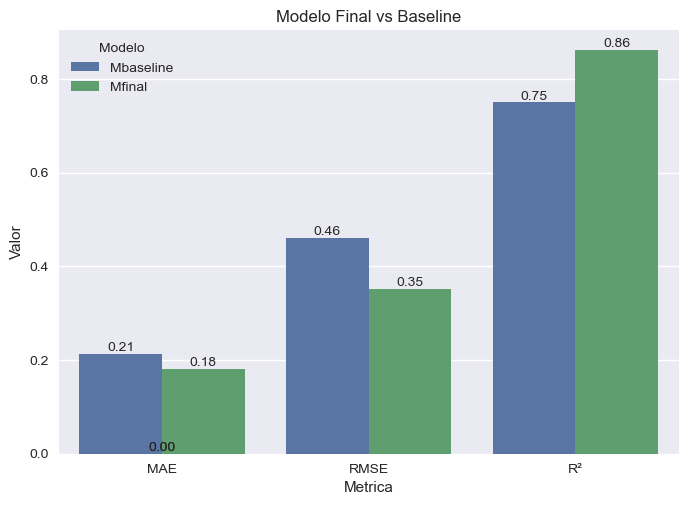

In [63]:
# Criar DataFrame com os dados

df_valores = pd.DataFrame({
    'Valores': [0.2128, 0.4613, 0.7504, 0.1816, 0.3527, 0.8616],
    'Metrica': ['MAE', 'RMSE', 'R²', 'MAE', 'RMSE', 'R²'],
    'Modelo' : ['Mbaseline', 'Mbaseline', 'Mbaseline', 'Mfinal', 'Mfinal', 'Mfinal']
},)

avalicao.diferencaModeloFinalBL(df_valores)



O modelo ajustado com hiperparâmetros obteve resultados bastante expressivos no conjunto de dados de teste. Abaixo estão as principais métricas alcançadas, com suas interpretações:

1. **MSE (Mean Squared Error)**: O modelo apresentou um MSE de 0,1245, indicando o erro quadrático médio das previsões em relação aos valores reais.

2. **RMSE (Root Mean Squared Error)**: Com um RMSE de 0,3529 (35,29%), o modelo teve um erro médio quadrático raiz relativamente baixo, reforçando sua capacidade de fazer previsões precisas e minimizar a influência de grandes erros pontuais.

3. **MAE (Mean Absolute Error)**: O modelo apresentou um MAE de 0,1804 (18,04%), indicando que, em média, as previsões do modelo estão erradas em cerca de 18,04% em relação ao valor real. Essa métrica é útil para avaliar erros absolutos médios sem dar peso desproporcional a grandes desvios.

4. **R² (Coeficiente de Determinação)**: O modelo obteve um R² de 0,8614 (86,14%), indicando que ele consegue explicar 86,14% da variância dos dados no conjunto de teste. Esse é um resultado muito positivo, mostrando que o modelo captura bem as relações entre as variáveis preditoras e a variável-alvo.

5. **Adjusted R² (R² Ajustado)**: O valor ajustado foi de 0,8583 (85,83%), confirmando a boa capacidade explicativa do modelo mesmo considerando o número de variáveis utilizadas.

---

### Comparação com o modelo padrão (sem ajuste de hiperparâmetros):

| Métrica | Melhoria sobre o modelo padrão |
| ------- | ------------------------------ |
| MAE     | 14,8%                          |
| R²      | 14,6%                          |
| RMSE    | 23,5%                          |

---

Por fim, as variáveis mais influentes no modelo ajustado serão analisadas para identificar quais características mais impactam as previsões e auxiliar na interpretação dos resultados para decisões práticas.


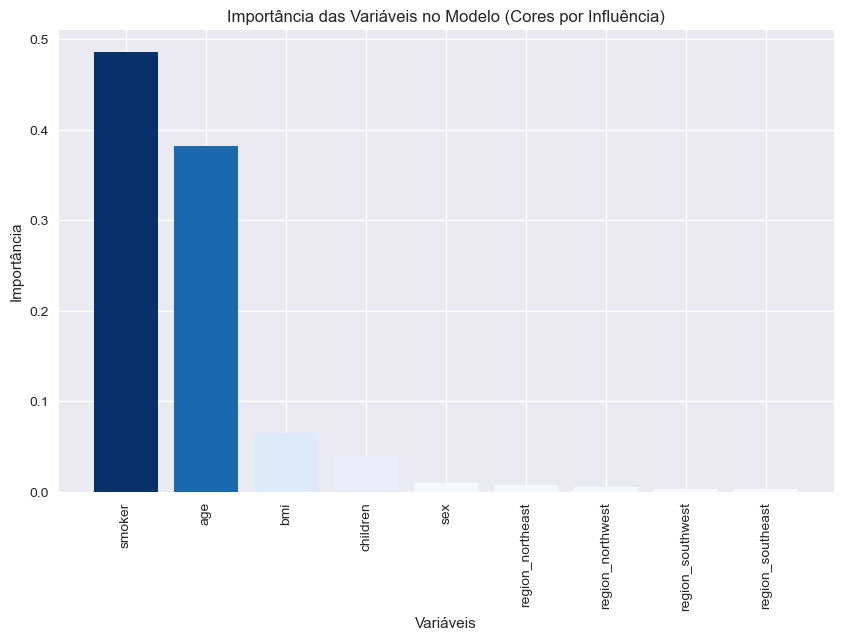

In [39]:
avalicao.importanciaVariaveis(X_train_tratado, melhorModelo)

Com base na análise apresentada no gráfico, observa-se que as variáveis **"smoker_yes"** (indicando se o paciente é fumante) e **"age"** (idade) possuem maior influência nos custos dos seguros médicos. Essas duas variáveis se destacam significativamente em relação às demais, como **"bmi"** (índice de massa corporal) e **"children"** (número de filhos), que apresentam influência muito menor.

Dessa forma, o modelo desenvolvido para prever os gastos médicos dos pacientes identifica **o tabagismo e a idade como os principais fatores determinantes** para os custos. Essas variáveis devem, portanto, ser priorizadas nas análises e recomendações relacionadas à precificação ou políticas de prevenção em saúde.

## Análise com Dados Originais (Validação Complementar)

Para garantir a robustez dos resultados e permitir uma interpretação direta em valores monetários, complementamos nossa análise testando o modelo nos dados originais (sem transformação logarítmica). Esta abordagem visa:

✓ **Traduzir métricas** para valores absolutos (R$) com significado prático imediato  
✓ **Validar a consistência** das relações identificadas (tabagismo e idade como drivers principais)  
✓ **Comparar desempenho** entre abordagens transformadas e não transformadas  

### Metodologia

- **Modelo utilizado**: RandomForestRegressor com os mesmos hiperparâmetros otimizados  
- **Métricas calculadas**:
  - `MAE` (Erro Absoluto Médio em R$)  
  - `RMSE` (Raiz do Erro Quadrático Médio em R$)  
  - `R²` (Coeficiente de Determinação)  



In [40]:

avalicao.avaliacaoDeEscalaOriginal(y_test, y_pred)


        AVALIAÇÃO DO MODELO NA ESCALA ORIGINAL (R$)         
• MAE (Erro Absoluto Médio):       R$ 1.960,33 (16,18%)
• RMSE (Raiz do Erro Quadrático):  R$ 4.308,45 (33,22%)
• R² (Poder Explicativo):          88.04%
• Custo Médio de Referência:       R$ 12.968,32




### **Análise de Trade-offs no Modelo de Custos Médicos**

#### **📌 Contexto do Projeto**

Desenvolvi um modelo de previsão de custos médicos usando **RandomForestRegressor** com uma base de **1.339 registros**. A variável target (`charges`) apresentava **assimetria acentuada**, então apliquei uma **transformação logarítmica** para melhorar a performance do modelo.

Mesmo após ajustes, o **RMSE ficou em 33,26% do custo médio**, indicando que valores extremos (outliers) ainda impactam significativamente as previsões.

---

### **🔍 Trade-off Enfrentado**

**"Remover outliers para melhorar as métricas ou mantê-los para preservar casos clinicamente relevantes?"**

| **Opção**            | **Vantagens**                            | **Desvantagens**                                                               |
| -------------------- | ---------------------------------------- | ------------------------------------------------------------------------------ |
| **Remover outliers** | - Melhora MAE/RMSE artificialmente       | - Perde casos raros, porém importantes (ex: pacientes com custos excepcionais) |
| **Manter outliers**  | - Preserva a integridade dos dados reais | - Métricas menos otimizadas (RMSE mais alto)                                   |

#### **Minha Decisão**

Optei por **manter os outliers**, pois:
✅ **Reflete a realidade dos dados**: Custos médicos têm variações extremas (ex: cirurgias complexas vs. consultas simples).
✅ **Evita viés em casos críticos**: Pacientes com custos altos são justamente os que mais precisam de previsão acurada.
✅ **Transparência**: Melhor comunicar um RMSE alto, mas realista, do que métricas "infladas" por filtros excessivos.

---

### **📊 Resultados e Interpretação**

| **Métrica**                   | **Valor**             | **Significado**                                                                         |
| ----------------------------- | --------------------- | --------------------------------------------------------------------------------------- |
| **MAE**                       | R\$ 1.960,38 (16,18%) | Erro médio "aceitável" para o domínio de saúde, considerando a variabilidade dos dados. |
| **RMSE**                      | R\$ 4.306,96 (33,26%) | Indica a presença de outliers, mas **não invalida** o modelo.                           |
| **R²**                        | **88,04%**            | Excelente poder explicativo, mesmo com a variação natural dos dados.                    |
| **Custo Médio de Referência** | R\$ 12.968,32         | Valor médio geral dos custos na base, para contextualizar os erros.                     |

